In [4]:
from torch.distributions import ContinuousBernoulli
import torch

cb1 = ContinuousBernoulli(0.3)
print(cb1.mean)

x = torch.Tensor([0.3])
print(x/(2*x-1) + 1/(2*torch.atanh(1-2*x)))

tensor(0.4302)
tensor([0.4302])


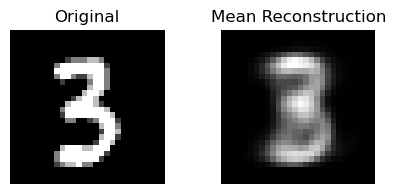

In [17]:
import matplotlib.pyplot as plt
# Monte Carlo estimation of p(x)
def monte_carlo_mean_estimate(vae, data, num_samples=100):
    vae.eval()
    with torch.no_grad():
        reconstructions = []
        for _ in range(num_samples):
            recon_x, _, _ = vae(data)
            reconstructions.append(recon_x)
    
    mean_reconstruction = torch.stack(reconstructions).mean(dim=0)
    return mean_reconstruction

# Choose a data point for Monte Carlo estimation
data_point, _ = next(iter(train_loader))
data_point = data_point[0].unsqueeze(0)

# Monte Carlo estimation of the mean
mean_reconstruction = monte_carlo_mean_estimate(vae, data_point, num_samples=1)

# Visualize the original data point and the mean reconstruction
plt.figure(figsize=(5, 2))
plt.subplot(1, 2, 1)
plt.imshow(data_point.view(28, 28).cpu().numpy(), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_reconstruction.view(28, 28).cpu().numpy(), cmap='gray')
plt.title('Mean Reconstruction')
plt.axis('off')

plt.show()


